In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

data = pd.read_json("preprocessingDoneRight.json")

E:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


35137


<function matplotlib.pyplot.show(*args, **kw)>

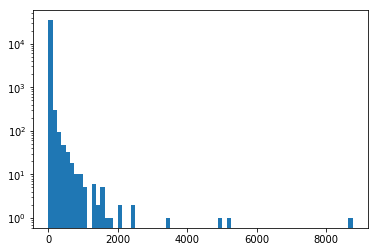

In [2]:
stemmed_words = pd.Series(' '.join(data['modded1']).split()).value_counts()
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

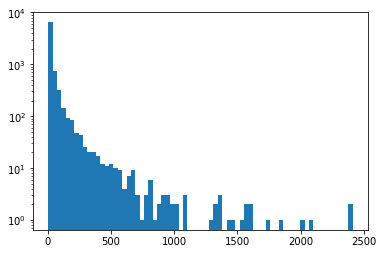

In [3]:
stemmed_words = stemmed_words[stemmed_words > 3]
stemmed_words = stemmed_words[stemmed_words < 3000]
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

In [4]:
#data['m'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
#pd.Series(' '.join(data['m']).split()).value_counts()
#sentences = data[data["year"] == 2016]["m"].tolist()


In [5]:
#don't count words
sentences = data[data["year"] == 2016]["modded1"].tolist()

In [6]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['foxnews', 'live', 'members', 'family', '1150', 'pm', 'ring', 'new', 'year', 'together', 'make', 'america', 'great'], tags=[0]),
 TaggedDocument(words=['happy', 'new', 'year', 'amp', 'thank'], tags=[1]),
 TaggedDocument(words=['happy', 'new', 'year', 'thank', 'great', 'family', 'support'], tags=[2]),
 TaggedDocument(words=['jallenaip', 'hillary', 'said', 'fog', 'war', 'explanation', 'lies', 'benghazi', 'fog', 'allowed', 'wh', 'vote', 'trump', 'potus'], tags=[3]),
 TaggedDocument(words=['sprinklermanus', 'cnn', 'realdonaldtrump', 'theyre', 'spending', 'millions', 'youre', 'still', 'going', 'win', 'go', 'donald', 'trump'], tags=[4]),
 TaggedDocument(words=['well', 'year', 'officially', 'begun', 'many', 'stops', 'planned', 'working', 'hard', 'win', 'turn', 'country', 'around'], tags=[5]),
 TaggedDocument(words=['marie7777777777', 'realdonaldtrump', 'love', 'u', 'trump', 'family', 'god', 'bless'], tags=[6]),
 TaggedDocument(words=['jodil792', 'standing', 'spreading',

In [7]:
tagged_data[0][0]

['foxnews',
 'live',
 'members',
 'family',
 '1150',
 'pm',
 'ring',
 'new',
 'year',
 'together',
 'make',
 'america',
 'great']

In [8]:
#model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=200, min_count=2, epochs=40)
model = Doc2Vec(vector_size=300, min_count=2, epochs=40)

model.build_vocab(tagged_data)


In [9]:
%time model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


Wall time: 11.1 s


In [10]:
ranks = []
second_ranks = []
for doc_id in range(len(tagged_data)):
    inferred_vector = model.infer_vector(tagged_data[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])


E:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [11]:
import collections

collections.Counter(ranks)  # Results vary between runs due to random seeding and very small corpus


Counter({0: 2003,
         20: 14,
         8: 43,
         4: 118,
         2: 246,
         7: 61,
         5: 96,
         12: 32,
         1: 452,
         48: 6,
         19: 19,
         6: 76,
         50: 6,
         9: 43,
         23: 11,
         26: 8,
         109: 4,
         16: 22,
         234: 1,
         164: 1,
         38: 6,
         239: 2,
         11: 37,
         3: 164,
         21: 15,
         66: 3,
         70: 3,
         2809: 1,
         17: 21,
         14: 32,
         10: 36,
         111: 2,
         733: 1,
         27: 14,
         51: 3,
         49: 8,
         91: 3,
         92: 3,
         453: 1,
         36: 7,
         45: 9,
         1057: 1,
         65: 5,
         388: 1,
         78: 3,
         445: 1,
         15: 19,
         2161: 1,
         1890: 1,
         31: 10,
         201: 2,
         80: 1,
         13: 23,
         1632: 1,
         162: 1,
         157: 1,
         54: 6,
         18: 12,
         1523: 1,
         80

In [12]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]: 
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tagged_data[sims[index][0]].words)))


Document (4208): «rt realdonaldtrump happy birthday donaldjtrumpjr»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d300,n5,w5,mc2,s0.001,t3):

MOST (3407, 0.970421552658081): «rt gop timkaines words debates2016»

SECOND-MOST (4208, 0.9680894613265991): «rt realdonaldtrump happy birthday donaldjtrumpjr»

MEDIAN (1944, 0.5621439814567566): «crooked hillary clinton discussing secondamendment private event cc nra»

LEAST (1160, -0.741342306137085): «clinton sanders people disrupted rally chicago say must talk people phony politicians»



In [13]:
X = []
for i in range(0,len(tagged_data)):
    X.append( model.infer_vector(tagged_data[i].words))

In [36]:
from sklearn.metrics import silhouette_score
from nltk.cluster import KMeansClusterer
import nltk

#stemmed counted
#0.112 8 cluster 
#0.12 8 cluster con lunghezza vettore 100
#0.135 8 cluster con lunghezza vettore 200
#0.133 8 cluster con lunghezza vettore 300

#not stemmed counted
#0.135 8 cluster con lunghezza 100
#0.149 8 cluster con lunghezza 200
#0.148 8 cluster con lunghezza 300

#all words not stemmed, no stopwords
#0.114 6 cluster 100
#0.136 8 cluster 100
#0.122 8 cluster 200
#0.144 8 cluster 300


#5 cluster not stemmed, 300, full sembra faccia cluster nicely, 0.14 e passa 
#4 " ", 0.142

NUM_CLUSTERS=4
%time kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=40)
%time assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
d = silhouette_score(X, assigned_clusters,metric='cosine')
print(d)

Wall time: 0 ns
Wall time: 5min 36s
0.14227235


In [37]:
datak = data[data["year"] == 2016]
datak["labels"] = assigned_clusters
datak

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,modded1_stemmed,labels
25967,6735,NaN,False,2108,"I will be on @FoxNews live, with members of m...",1,2016,0,53,2016-01-01,"i will be on @foxnews live, with members of my...",foxnews live members family 1150 pm ring new y...,foxnew live member famili 1150 pm ring ...,1
25968,8581,NaN,False,3460,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/Y...,1,2016,3,53,2016-01-01,happy new year &amp; thank you! https://t.co/y...,happy new year amp thank,happi new year amp thank,0
25970,8258,NaN,False,1948,Happy New Year from #MarALago! Thank you to my...,1,2016,6,53,2016-01-01,happy new year from #maralago! thank you to my...,happy new year thank great family support,happi new year thank great famili support,0
25971,7490,NaN,False,2721,"""@jallenaip: Hillary said she was in a ""Fog of...",1,2016,6,53,2016-01-01,"""@jallenaip: hillary said she was in a ""fog of...",jallenaip hillary said fog war explanation lie...,jallenaip hillari said fog war explan l...,3
25972,3330,NaN,False,933,"""@sprinklermanus: @CNN @realDonaldTrump they'r...",1,2016,21,53,2016-01-01,"""@sprinklermanus: @cnn @realdonaldtrump they'r...",sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,1
25973,8495,NaN,False,2642,"Well, the year has officially begun. I have ma...",1,2016,23,53,2016-01-01,"well, the year has officially begun. i have ma...",well year officially begun many stops planned ...,well year offici begun mani stop plan ...,3
25974,2780,NaN,False,654,"""@marie7777777777: @realDonaldTrump we love u ...",1,2016,23,53,2016-01-01,"""@marie7777777777: @realdonaldtrump we love u ...",marie7777777777 realdonaldtrump love u trump f...,marie7777777777 realdonaldtrump love u tr...,1
25975,3066,NaN,False,893,"""@JodiL792: We are Standing with you! Spreadin...",1,2016,23,53,2016-01-01,"""@jodil792: we are standing with you! spreadin...",jodil792 standing spreading wordtrump presiden...,jodil792 stand spread wordtrump presid 2...,0
25976,3492,NaN,False,881,"""@MEMEoryHead: I'm one of your biggest fans Mr...",1,2016,23,53,2016-01-01,"""@memeoryhead: i'm one of your biggest fans mr...",memeoryhead im one biggest fans mr trump cant ...,memeoryhead im one biggest fan mr trump...,1
25977,3346,NaN,False,922,"""@CASuperrunner: @georgehenryw Huckabee is a g...",1,2016,23,53,2016-01-01,"""@casuperrunner: @georgehenryw huckabee is a g...",casuperrunner huckabee good manbut needs get b...,casuperrunn huckabe good manbut need get...,1


In [38]:
clusters_wordCount = []
for cluster in range(0,NUM_CLUSTERS):
    c = datak[datak["labels"] == cluster]
   # words = pd.Series(' '.join(c['m']).split()).value_counts()
    words = pd.Series(' '.join(c['modded1']).split()).value_counts()
    m = words.mean()
    words = words[words > m]
    clusters_wordCount.append(words)
    print("Cluster " + str(cluster) + " dimension " + str(len(c)))

Cluster 0 dimension 1176
Cluster 1 dimension 847
Cluster 2 dimension 1177
Cluster 3 dimension 1009


In [39]:
for c in range(0,NUM_CLUSTERS):
    print("cluster ", c , clusters_wordCount[c][0:10])

cluster  0 thank                    435
trump2016                251
great                    233
makeamericagreatagain    208
join                     149
amp                      128
america                  107
vote                     101
trump                    100
get                       87
dtype: int64
cluster  1 realdonaldtrump    240
great              192
trump              166
thank               87
foxnews             79
tonight             72
cnn                 71
rt                  65
america             60
enjoy               58
dtype: int64
cluster  2 hillary    204
cruz       149
clinton    129
trump      117
crooked    115
new        105
ted        100
great       89
people      86
thank       83
dtype: int64
cluster  3 hillary      216
clinton      126
amp          119
crooked      106
great         90
people        86
america       86
president     78
make          74
jobs          74
dtype: int64


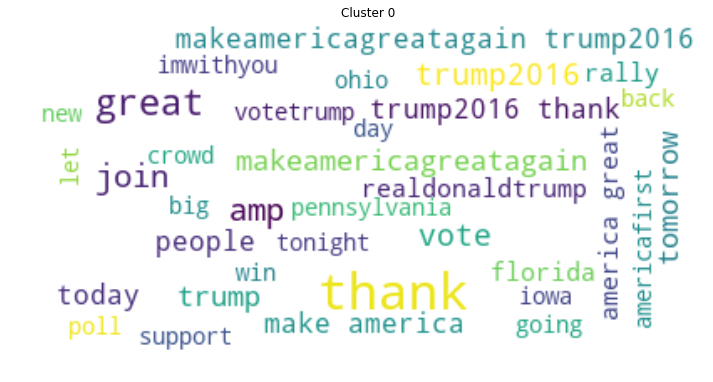

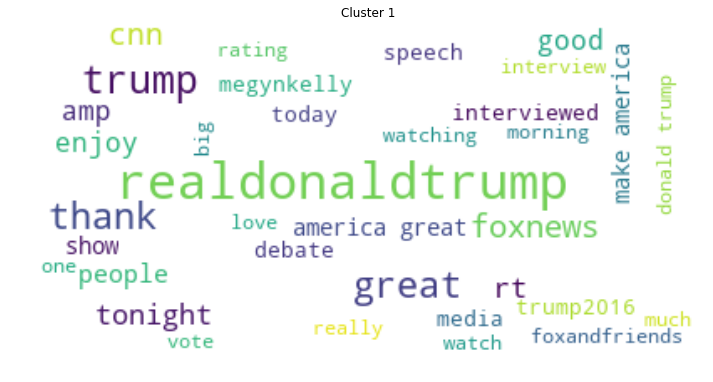

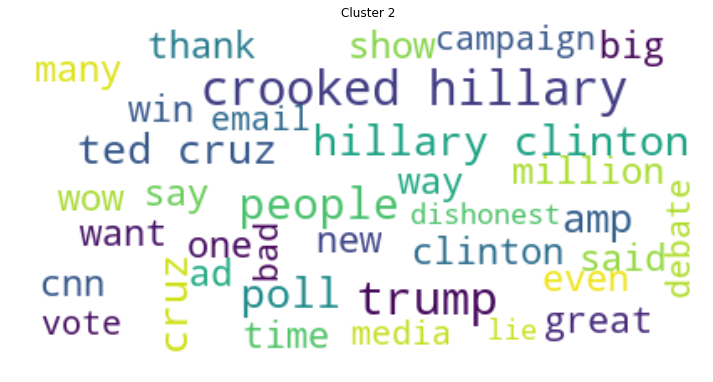

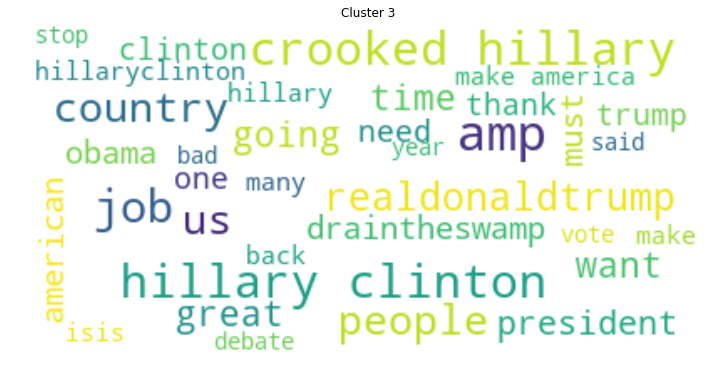

In [42]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in range(0,NUM_CLUSTERS):
    temp = datak[datak["labels"] == c] 
    text = temp["modded1"]
    text = text.str.cat(sep=' ')

    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
